In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler



2023-08-11 14:10:37.844281: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 14:10:37.877757: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 14:10:37.878254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 14:10:39.699207: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data = pd.read_csv('autoencoder_augment.csv')
data = data.drop(columns=['Unnamed: 0.1'])
data = data.drop(columns=['Unnamed: 0'])

In [4]:
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,encoded_22,encoded_23,encoded_24,encoded_25,encoded_26,encoded_27,encoded_28,encoded_29,encoded_30,encoded_31
0,25,226802,7,1,0,0,40,1,0,0,...,30.103570,0.0,15.536768,46.716366,0.000000,9.117380,49.708584,22.820082,0.0,0.0
1,34,198693,6,1,0,0,30,1,0,0,...,38.796340,0.0,10.734479,18.413360,0.000000,22.856050,37.405180,43.249992,0.0,0.0
2,24,369667,10,0,0,0,40,1,0,0,...,21.170408,0.0,8.786838,22.989090,0.000000,27.532420,47.879517,85.125550,0.0,0.0
3,26,82091,9,0,0,0,39,1,0,0,...,56.837727,0.0,6.264252,17.991486,0.000000,72.322130,36.475597,49.759247,0.0,0.0
4,20,444554,10,1,0,0,25,1,0,0,...,79.706800,0.0,0.000000,52.771770,0.000000,26.510931,69.719340,85.606804,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,30,345898,9,1,0,0,46,1,0,0,...,50.816303,0.0,11.700149,21.999025,0.000000,32.649940,29.068645,39.755905,0.0,0.0
14708,65,99359,15,1,1086,0,60,1,0,0,...,21.846290,0.0,0.000000,23.149977,0.000000,65.357350,18.440727,61.950848,0.0,0.0
14709,32,116138,14,1,0,0,11,1,0,0,...,64.806240,0.0,40.849530,3.358093,0.000000,30.450596,81.266840,80.908936,0.0,0.0
14710,22,310152,10,1,0,0,40,1,0,0,...,66.221176,0.0,48.086967,19.544275,0.000000,19.227009,39.152866,51.216038,0.0,0.0


In [5]:
unlabel_test = pd.read_csv('unlabelled_test.csv')
unlabel_test = unlabel_test.drop(columns=['Unnamed: 0'])
unlabel_test = unlabel_test.drop(columns=['income'])
encoder = load_model('my_encoder_model.keras')

import joblib

# Load the scaler from the file
scaler_filename = 'scaler.pkl'
scaler = joblib.load(scaler_filename)

# Normalize the data using the same scaler you used for training
normalized_data = scaler.transform(unlabel_test)  # Assuming 'scaler' is the scaler used for training

# Use the encoder to encode the normalized data
encoded_data = encoder.predict(normalized_data)

# Convert the encoded data to a DataFrame if needed
encoded_df = pd.DataFrame(encoded_data, columns=[f'encoded_{i}' for i in range(32)])


unlabel_test = pd.read_csv('unlabelled_test.csv')
unlabel_test = unlabel_test.drop(columns=['Unnamed: 0'])

Z = unlabel_test.merge(encoded_df, left_index=True, right_index=True)

X_unlabelled = Z.drop(columns=['income'])
y_unlabelled = Z['income']



32/32 [==============================] - 0s 638us/step


# baseline decision tree

Within cluster Test Accuracy: 0.9493713897383622
Confusion Matrix:
[[  58   67]
 [  82 2736]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.41      0.46      0.44       125
        >50K       0.98      0.97      0.97      2818

    accuracy                           0.95      2943
   macro avg       0.70      0.72      0.71      2943
weighted avg       0.95      0.95      0.95      2943



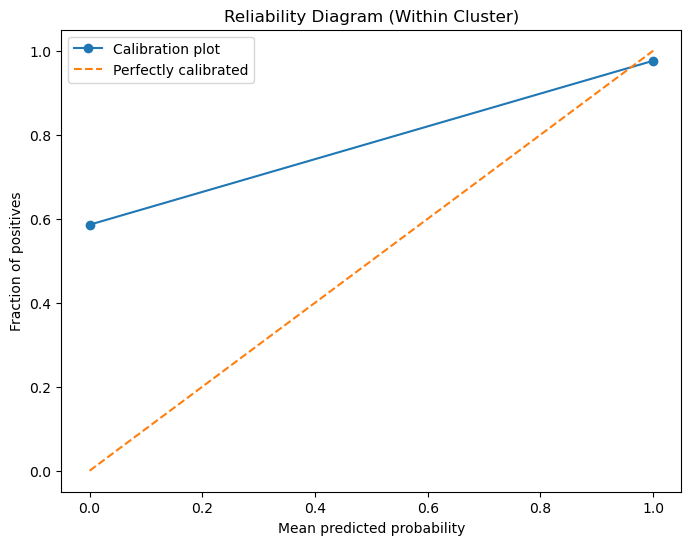

feature importance
Feature Importances:
            Feature  Importance
4      capital-gain    0.266001
2   educational-num    0.068692
0               age    0.053256
70       encoded_28    0.044274
58       encoded_16    0.034388
..              ...         ...
34    Other-service    0.000000
35  Priv-house-serv    0.000000
36   Prof-specialty    0.000000
39     Tech-support    0.000000
73       encoded_31    0.000000

[74 rows x 2 columns]
Predictions on unseen data from the unlabelled cluster
Unlabelled Data Test Accuracy: 0.35
Confusion Matrix (Unlabelled Data):
[[348   0]
 [650   2]]
Classification Report (Unlabelled Data):
              precision    recall  f1-score   support

       <=50K       0.35      1.00      0.52       348
        >50K       1.00      0.00      0.01       652

    accuracy                           0.35      1000
   macro avg       0.67      0.50      0.26      1000
weighted avg       0.77      0.35      0.18      1000



/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


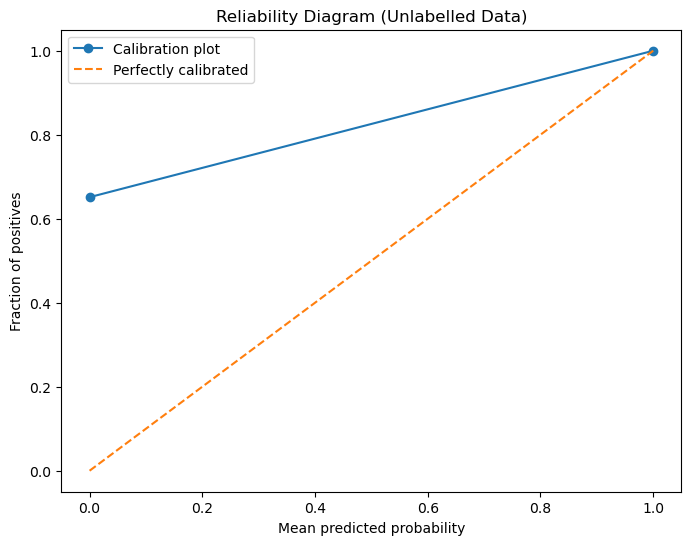

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt


# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Within Cluster)')
plt.legend()
plt.show()


print('feature importance')
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

print("Predictions on unseen data from the unlabelled cluster")
# Make predictions on the unlabelled test data

y_pred_unlabelled = model.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

# Calculate confusion matrix for unlabelled data
cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()

In [8]:
feature_importance_df.head(20)

,Feature,Importance
4,capital-gain,0.266001
2,educational-num,0.068692
0,age,0.053256
70,encoded_28,0.044274
58,encoded_16,0.034388
51,encoded_9,0.034312
48,encoded_6,0.033539
69,encoded_27,0.030175
47,encoded_5,0.028279
55,encoded_13,0.027414


# baseline random forest

Within cluster Test Accuracy: 0.9680598029221883
Confusion Matrix:
[[  43   82]
 [  12 2806]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.78      0.34      0.48       125
        >50K       0.97      1.00      0.98      2818

    accuracy                           0.97      2943
   macro avg       0.88      0.67      0.73      2943
weighted avg       0.96      0.97      0.96      2943



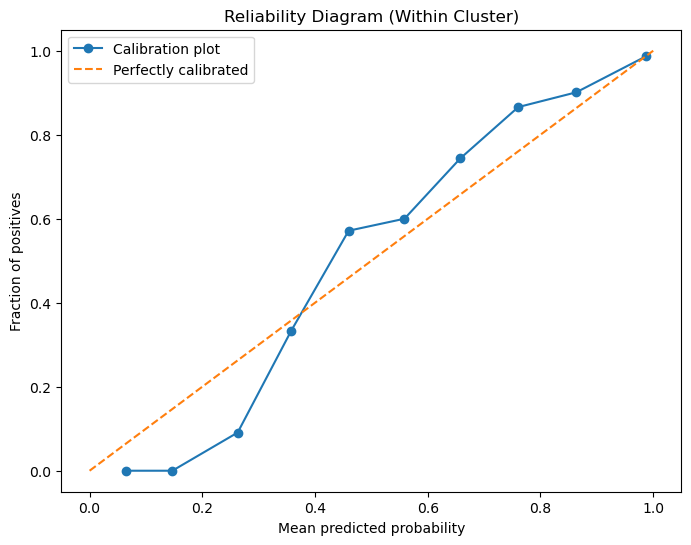

feature importance
Feature Importances:
            Feature  Importance
4      capital-gain    0.125452
58       encoded_16    0.044082
42        encoded_0    0.042899
0               age    0.040371
2   educational-num    0.039512
..              ...         ...
21          Husband    0.000000
26             Wife    0.000000
28     Armed-Forces    0.000000
41          cluster    0.000000
62       encoded_20    0.000000

[74 rows x 2 columns]
Predictions on unseen data from the unlabelled cluster
Unlabelled Data Test Accuracy: 0.523
Confusion Matrix (Unlabelled Data):
[[150 198]
 [279 373]]
Classification Report (Unlabelled Data):
              precision    recall  f1-score   support

       <=50K       0.35      0.43      0.39       348
        >50K       0.65      0.57      0.61       652

    accuracy                           0.52      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.55      0.52      0.53      1000



/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


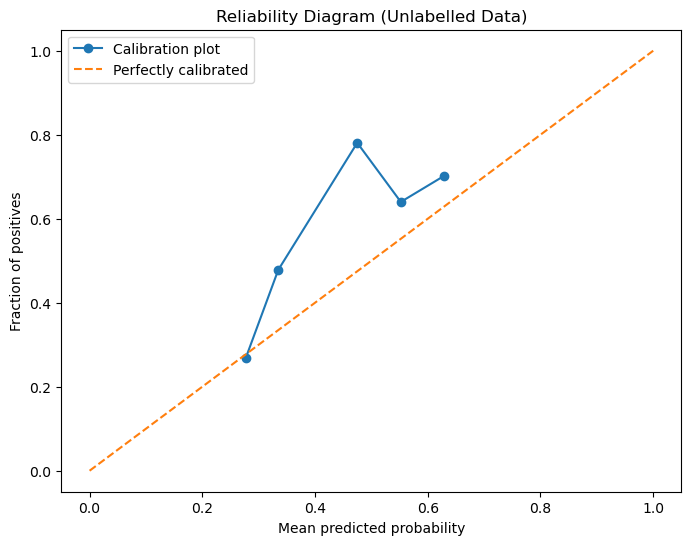

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Within Cluster)')
plt.legend()
plt.show()


print('feature importance')
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


print("Predictions on unseen data from the unlabelled cluster")
# Make predictions on the unlabelled test data

y_pred_unlabelled = model.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

# Calculate confusion matrix for unlabelled data
cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()

# baseline logistic regression

Within cluster Test Accuracy: 0.9653414882772681
Confusion Matrix:
[[  38   87]
 [  15 2803]]
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.72      0.30      0.43       125
        >50K       0.97      0.99      0.98      2818

    accuracy                           0.97      2943
   macro avg       0.84      0.65      0.70      2943
weighted avg       0.96      0.97      0.96      2943



/usr/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


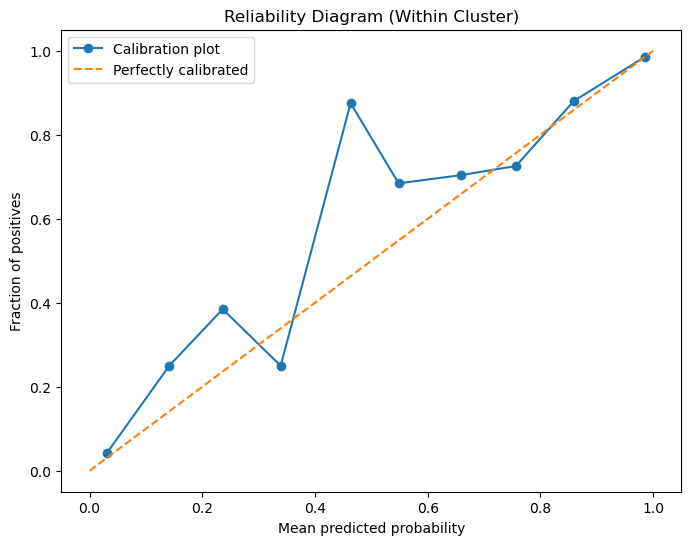

/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/lib64/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Predictions on unseen data from the unlabelled cluster
Unlabelled Data Test Accuracy: 0.707
Confusion Matrix (Unlabelled Data):
[[ 77 271]
 [ 22 630]]
Classification Report (Unlabelled Data):
              precision    recall  f1-score   support

       <=50K       0.78      0.22      0.34       348
        >50K       0.70      0.97      0.81       652

    accuracy                           0.71      1000
   macro avg       0.74      0.59      0.58      1000
weighted avg       0.73      0.71      0.65      1000



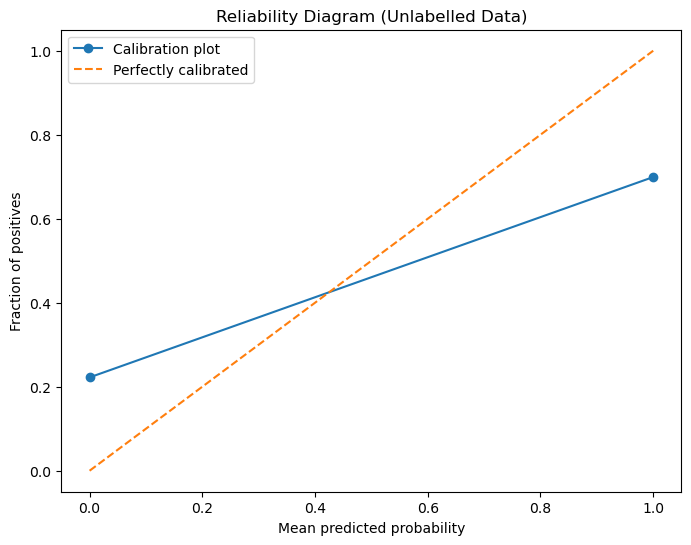

In [9]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve
# Split the data into features and labels
X = data.drop(columns=['income'])
y = data['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Within cluster Test Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate other scores (precision, recall, F1 score, support)
report = classification_report(y_test, y_pred, target_names=['<=50K', '>50K'])
print("Classification Report:")
print(report)

# Calculate reliability diagram for calibration
prob_pos = model.predict_proba(X_test_scaled)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, prob_pos, n_bins=10)

# Plot the reliability diagram
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Within Cluster)')
plt.legend()
plt.show()

print("Predictions on unseen data from the unlabelled cluster")
# Make predictions on the unlabelled test data

y_pred_unlabelled = model.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

# Calculate confusion matrix for unlabelled data
cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability') 
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()